[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed

MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'NFLX'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AMZN'),
            (    'Close', 'NFLX'),
            (    'Close', 'TSLA'),
            (     'High', 'AMZN'),
            (     'High', 'NFLX'),
            (     'High', 'TSLA'),
            (      'Low', 'AMZN'),
            (      'Low', 'NFLX'),
            (      'Low', 'TSLA'),
            (     'Open', 'AMZN'),
            (     'Open', 'NFLX'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AMZN'),
            (   'Volume', 'NFLX'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])
The optimal portfolio allocation: 
AMZN: 33.33%
NFLX: 33.33%
TSLA: 33.33%
Expected Daily Portfolio return: 0.2201%
Expected Daily Volatility: 2.1279%
My personal investment plan with $100000: 
AMZN:$33333.33 buys 172 shares at $193.06
NFLX:$33333.33 buys 29 shares at $1140.22
TSLA:$33333.33 buys 111 shares at $298.26



C:\Users\Darshan Giri\AppData\Local\Temp\ipykernel_22540\949121142.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{ticker}:${allocation_amount[i]:.2f} buys {num_shares[i]} shares at ${latest_prices[i]:.2f}")


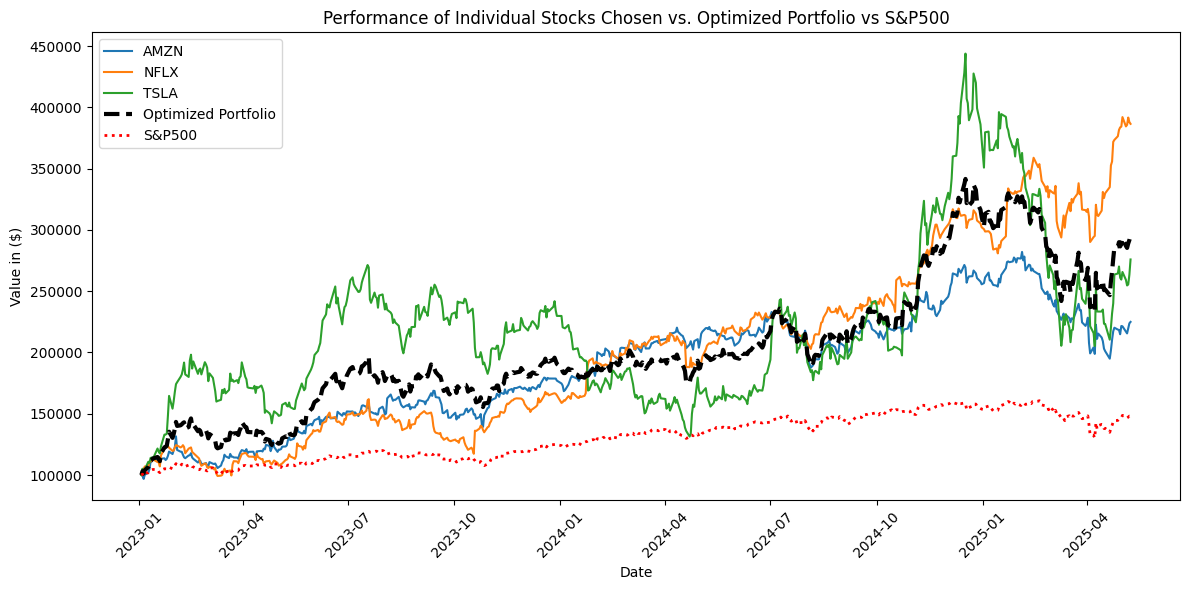

In [4]:
#Portfolio optimization project
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import datetime
stocks_chosen=[]
for i in range(3):
    ticker= input(f'ticker symbol of stock {i+1}:').upper()
    stocks_chosen.append(ticker)
try:
    investment_limit=int(input(f'Investment budget: '))
except ValueError:
    print('Please enter a valid dollar value for the investment budget.')
    exit()

start_date=str(input(f'Start date in YYYY-MM-DD: '))
try:
    datetime.datetime.strptime(start_date,"%Y-%m-%d")
except ValueError:
    print('Start date must be in the format of YYYY-MM-DD.')
    exit()
end_date=str(input(f'End date in YYYY-MM-DD: '))
try:
    datetime.datetime.strptime(end_date,"%Y-%m-%d")
except ValueError:
    print('End date must also be in the format YYYY-MM-DD.')
    exit()
try:
    data=yf.download(tickers=stocks_chosen,start=start_date,end=end_date, auto_adjust=False)
    adj_close=data['Adj Close'].copy()
    adj_close=adj_close.dropna(axis=1, how='all')
    sp500=yf.download('^GSPC', start=start_date, end=end_date, auto_adjust=False)['Adj Close']
    sp500=sp500.dropna()
    normalized_sp500=(sp500/sp500.iloc[0])*investment_limit
except Exception as e:
    print("Error fetching stock data or adjusting the close prices.")
    print(f"The Details:{e}")
    exit()
if adj_close.empty:
    print('No valid stock data found. Please check the tickers and date range.')
print(data.columns)

returns=adj_close.pct_change().dropna()
mean_returns=returns.mean()
cov_matrix=returns.cov()
tickers=adj_close.columns.tolist()

def negative_return(weights, mean_returns):
    return -np.dot(weights, mean_returns)

num_assets=len(tickers)
initial_guess=np.ones(num_assets)/num_assets
boundries=tuple((0,1) for i in range(num_assets))
constraints={'type':'eq','fun':lambda w: np.sum(w)-1}

result=minimize(negative_return,initial_guess,args=(mean_returns,),method='SLSQP', bounds=boundries, constraints=constraints)

optimal_weights=result.x
portfolio_return=np.dot(optimal_weights,mean_returns)
portfolio_volatility=np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix,optimal_weights)))
print('The optimal portfolio allocation: ')

for i,ticker in enumerate(tickers):
    print(f"{ticker}: {optimal_weights[i]*100:.2f}%")

trading_days=252
annual_return=portfolio_return* trading_days
annual_volatility=portfolio_volatility*np.sqrt(trading_days)

print(f"Expected Daily Portfolio return: {portfolio_return*100:.4f}%")
print(f"Expected Daily Volatility: {portfolio_volatility*100:.4f}%")



latest_prices=adj_close.iloc[-1]

allocation_amount=optimal_weights*investment_limit

num_shares=(allocation_amount/latest_prices).astype(int)
print(f"My personal investment plan with ${investment_limit}: ")

for i,ticker in enumerate(tickers):
    print(f"{ticker}:${allocation_amount[i]:.2f} buys {num_shares[i]} shares at ${latest_prices[i]:.2f}")

normalized_prices = adj_close / adj_close.iloc[0]
portfolio_value = (normalized_prices * optimal_weights).sum(axis=1) * investment_limit

plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(normalized_prices[ticker] * investment_limit, label=ticker)
plt.plot(portfolio_value, label='Optimized Portfolio', linestyle='--', linewidth=3, color='black')
plt.plot(normalized_sp500,label='S&P500', linestyle=':', linewidth=2, color='red')
plt.xlabel('Date')
plt.ylabel('Value in ($)')
plt.xticks(rotation=45)
plt.title("Performance of Individual Stocks Chosen vs. Optimized Portfolio vs S&P500")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [5]:
print(f"Expected Annual Portfolio Return: {annual_return*100:.2f}%")
print(f"Expected Annual Volatility:{annual_volatility*100:.2f}%")

Expected Annual Portfolio Return: 55.46%
Expected Annual Volatility:33.78%
